In [1]:
'''
Ignore Warnings to prevent cluttering the output
'''
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
import statsmodels.api as sm

'''
Importing all functions from scipy.stats for statistical analysis
'''
from scipy.stats import *  

'''
Importing timedelta and datetime for handling time-related operations
'''
from datetime import timedelta
import datetime  

'''
This is to enable inline plotting in matplotlib
'''
%matplotlib inline

'''
This line is to set the seaborn plot style to dark
which is a built-in style in seaborn
'''
sns.set_style('dark')  


This code snippet performs several important tasks to enable data analysis and visualization:

1. **Ignoring Warnings**: The `warnings.filterwarnings('ignore')` line ensures that warning messages are suppressed, which helps in keeping the output clean and focused.

2. **Importing Libraries**:
   - `pandas`: Used for data manipulation and analysis.
   - `matplotlib.pyplot`: Enables plotting functionalities.
   - `seaborn`: Provides high-level interface for creating informative statistical graphics.
   - `statsmodels.api`: Used for statistical analysis and modeling.

3. **Importing Functions**: 
   - The line `from scipy.stats import *` imports all functions from the `scipy.stats` module, facilitating statistical analysis.

4. **Handling Time-related Operations**:
   - `timedelta` from `datetime` module: Used for arithmetic operations on dates and times.
   - `datetime`: Provides classes for manipulating dates and times.

5. **Enabling Inline Plotting**: `%matplotlib inline` command ensures that plots generated using `matplotlib` are displayed inline within Jupyter notebooks or IPython environments.

6. **Setting Plot Style**:
   - `sns.set_style('dark')`: Sets the default style for seaborn plots to a dark background, enhancing visual appeal and readability of plots.

In [15]:
# Reading the dataset from the provided URL using pandas
# This dataset contains daily Covid-19 data for different states in India
train = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')

# Converting the 'Date' column to datetime format for better handling of dates
train['Date'] = pd.to_datetime(train['Date'], format="%d-%b-%y")

# Displaying the last few rows of the dataset to verify the changes
train.tail()


,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
1786,2021-10-30,2021-10-30,Recovered,14672,1,535,10,371,2,2,...,27,1,3,1172,191,8,9,6,880,0
1787,2021-10-30,2021-10-30,Deceased,445,0,2,0,4,0,0,...,1,0,0,14,1,0,0,0,13,0
1788,2021-10-31,2021-10-31,Confirmed,12907,0,385,1,212,8,5,...,26,2,21,1009,121,12,6,5,914,0
1789,2021-10-31,2021-10-31,Recovered,13152,0,675,9,236,9,3,...,25,2,8,1183,183,2,6,9,913,0
1790,2021-10-31,2021-10-31,Deceased,251,0,4,0,1,0,0,...,1,0,1,19,1,0,0,0,15,0


1. **We read the dataset** from the provided URL, which contains daily Covid-19 data for different states in India, and store it in the variable `train`.

2. We **convert** the '`Date`' column in the dataset to *datetime* format using `pd.to_datetime()` for better handling of dates.

3. We display the **last few rows** of the dataset using `train.tail()` to verify the changes made.


In [16]:

# List of state-wise columns to be dropped as we are predicting total cases ('TT')
cols = ['AN','AP',	'AR',	'AS',	'BR',	'CH',	'CT',	'DD',	'DL',	'DN',	'GA',	'GJ',	'HP',	'HR',	'JH', 'JK',	'KA',	'KL',	'LA',	'LD',	'MH',	'ML',	'MN',	'MP',	'MZ',	'NL',	'OR',	'PB',	'PY',	'RJ',	'SK',	'TG',	'TN',	'TR',	'UP',	'UT',	'WB']

# Dropping state-wise columns from the dataset
train.drop(cols, axis=1, inplace=True)

# Setting the index of the dataframe to 'Status' column
train = train.set_index('Status')

# Dropping 'Recovered' and 'Deceased' rows as we are focusing on total cases
train.drop(['Recovered', 'Deceased'], inplace=True)

# Resetting the index after dropping unnecessary rows
train = train.reset_index()

# Dropping the 'Status' column as it is no longer needed for analysis
train.drop(["Status"], axis=1, inplace=True)
train.tail()

# Copying data from the 'train' DataFrame to the 'train_df' DataFrame to preserve the original dataset
train_df = train
train_df.head()

,Date,Date_YMD,TT,UN
0,2020-03-14,2020-03-14,81,0
1,2020-03-15,2020-03-15,27,0
2,2020-03-16,2020-03-16,15,0
3,2020-03-17,2020-03-17,11,0
4,2020-03-18,2020-03-18,37,0


1. **We define a list** `cols` containing the names of state-wise columns to be dropped.
2. We use `drop()` method along `axis=1` to **drop the specified columns** from the `train` dataframe in-place.
3. We **set the index of the dataframe** to the 'Status' column, assuming it contains categories like 'Confirmed', 'Recovered', and 'Deceased'.
4. We **drop rows corresponding to** 'Recovered' and 'Deceased' status to focus on the total cases ('TT').
5. We **reset the index to default** after dropping rows to avoid any index inconsistencies.
6. We **drop the** `Status` column as it is no longer needed for further analysis.
7. Finally, **we create a copy of** `train` to `train_df` to preserve the original data and be able to work on the dataframe.

<Axes: xlabel='Date', ylabel='TT'>

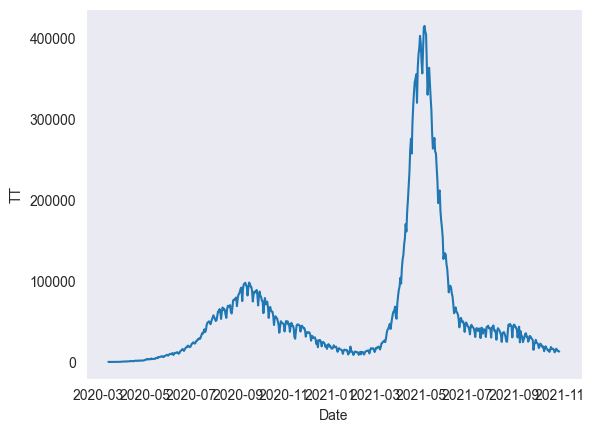

In [17]:
sns.lineplot(x="Date", y="TT",legend = 'full' , data=train_df)

In [18]:
# Set 'Date' column as the index column as forecasting will be done for this column
train_df.set_index('Date', inplace=True)

# Convert 'TT' column to float for statistical calculations
train_df['TT'] = train_df['TT'].astype(float)

# Display the first few rows of the DataFrame
train_df.head()

,Date_YMD,TT,UN
Date,,,
2020-03-14,2020-03-14,81.0,0
2020-03-15,2020-03-15,27.0,0
2020-03-16,2020-03-16,15.0,0
2020-03-17,2020-03-17,11.0,0
2020-03-18,2020-03-18,37.0,0


<Figure size 640x480 with 0 Axes>

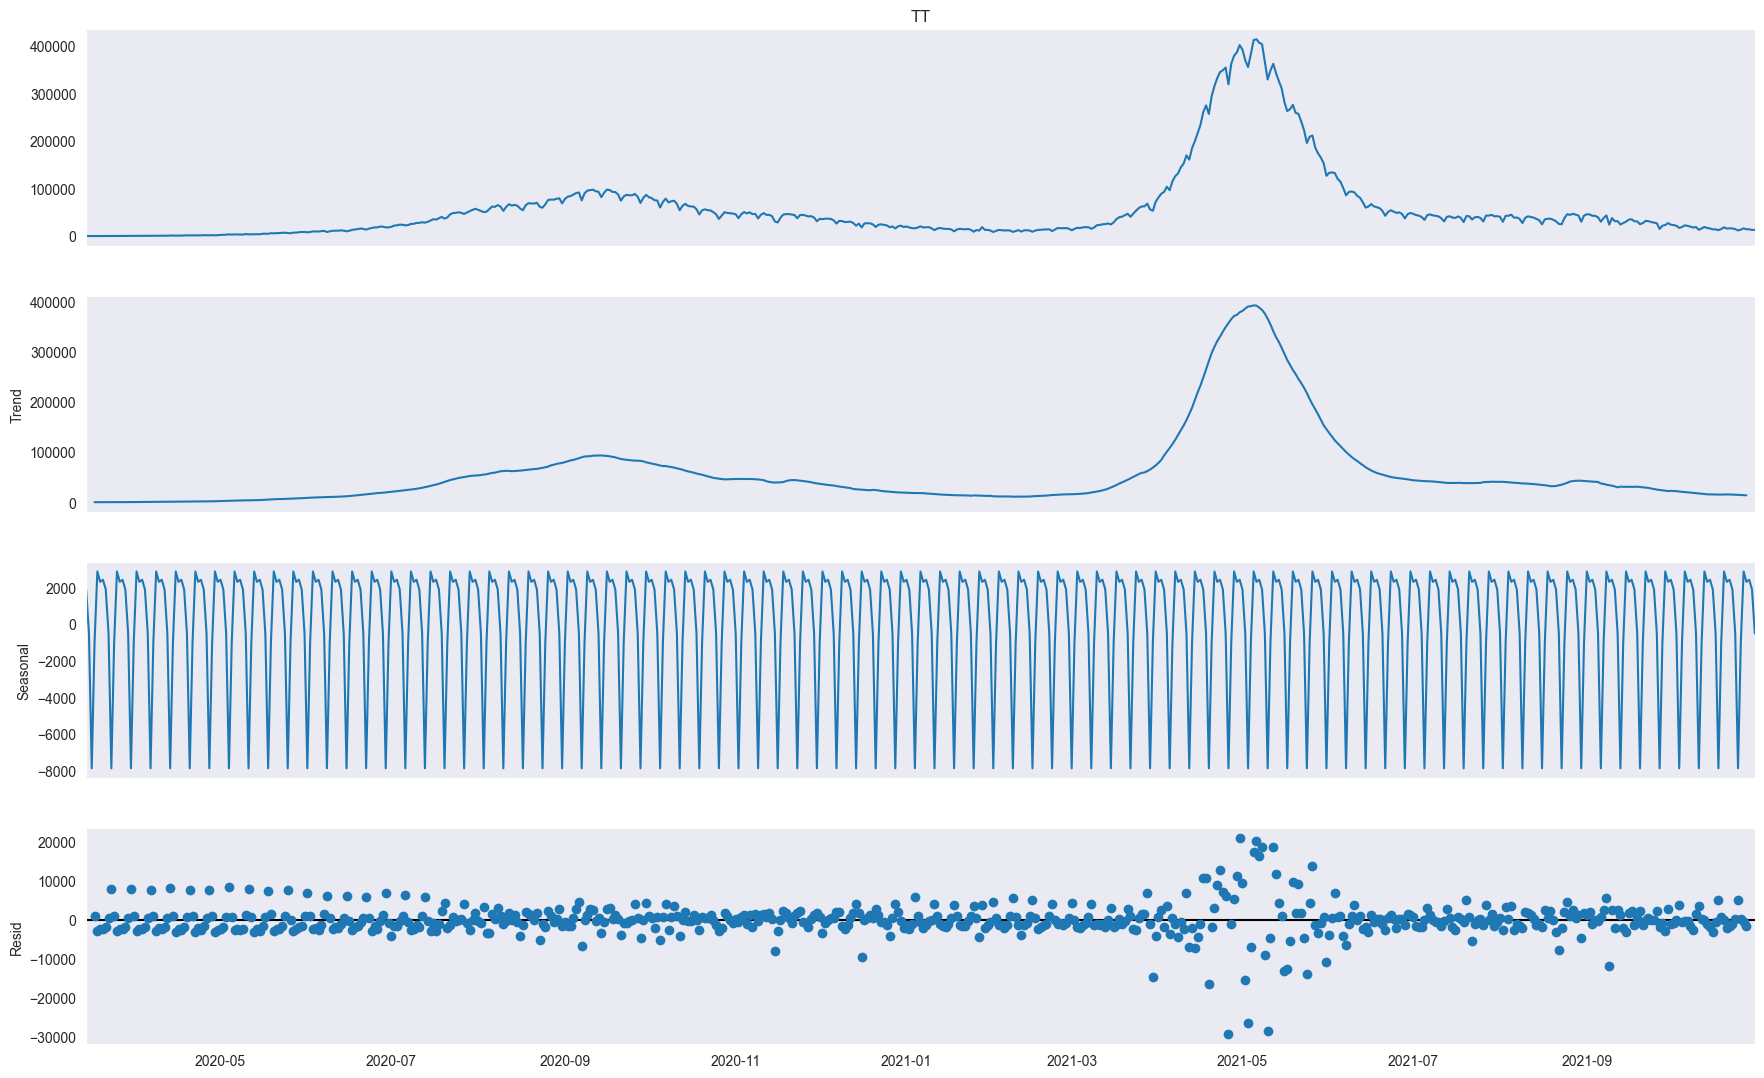

In [19]:
# Import the necessary library for seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on the 'TT' column using an additive model
result = seasonal_decompose(train_df['TT'], model='additive')

# Create a figure object for plotting
fig = plt.figure()

# Plot the decomposed time series components (trend, seasonality, residual)
fig = result.plot()

# Set the size of the figure
fig.set_size_inches(20, 12)


The **trend** graph appears stationary. Time Series forecasting can be done on stationary data and hence no further processing to make it stationery should be required but we can check if it is stationary using the **Dickey-Fuller Test**

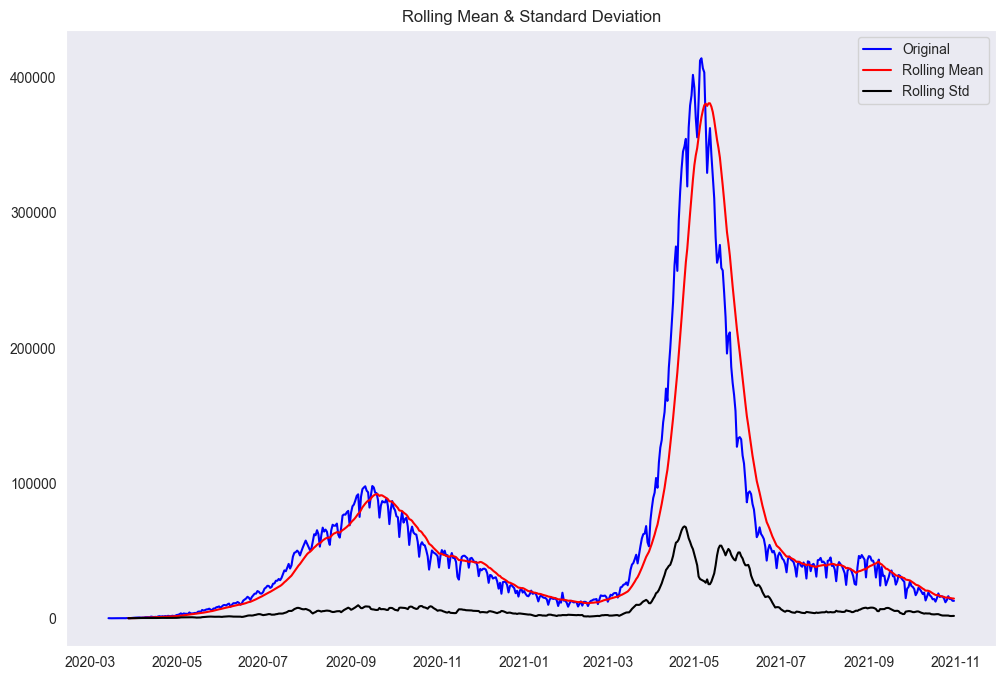

Results of Dickey-Fuller Test:
p-value = 0.0201. The series is likely non-stationary.
Test Statistic                  -3.198105
p-value                          0.020095
#Lags Used                      19.000000
Number of Observations Used    577.000000
Critical Value (1%)             -3.441734
Critical Value (5%)             -2.866562
Critical Value (10%)            -2.569445
dtype: float64


In [21]:
# Import necessary libraries
from statsmodels.tsa.stattools import adfuller  # Import Augmented Dickey-Fuller unit root test
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to test stationarity of a time series
def test_stationarity(timeseries, window=15, cutoff=0.01):
    # Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()
    
    # Plot original time series, rolling mean, and rolling standard deviation
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform Augmented Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    # Add critical values to the output
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    
    # Check p-value against cutoff for stationarity
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    # Print Dickey-Fuller test results
    print(dfoutput)

# Example usage:
# Assuming train_df['TT'] is the time series to be tested for stationarity
test_stationarity(train_df['TT'])


1. Calling the function gives below result , where we can observe the huge gap between orignal data and mean,std
2. Also the `pvalue` is `0.020095` which is not so good and hence , the output says **"The series is likely non-stationary."**

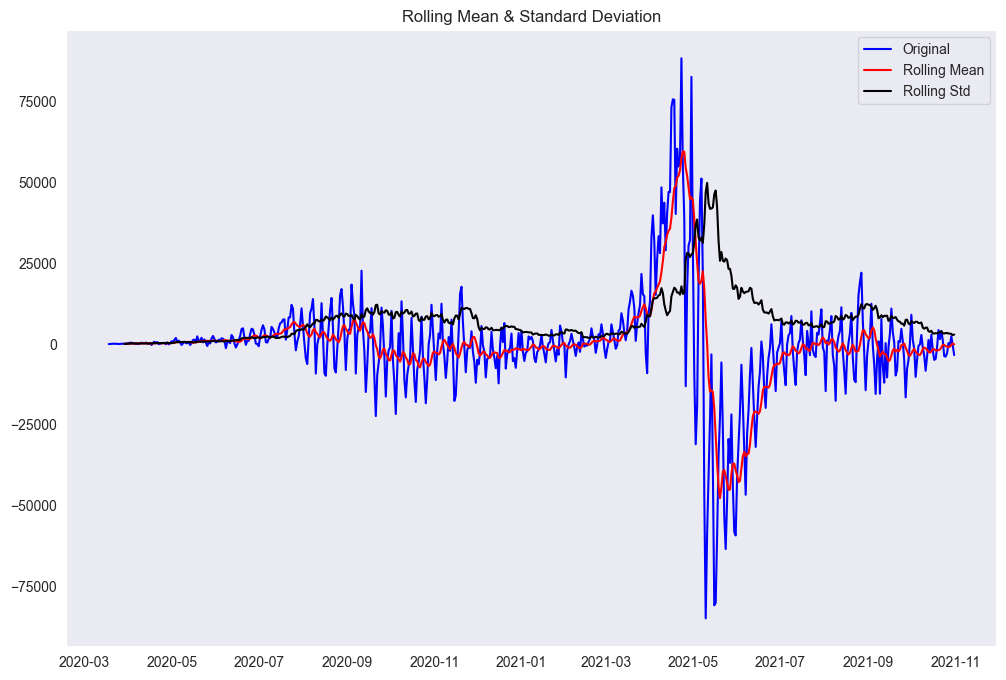

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.240639e+00
p-value                        4.706636e-08
#Lags Used                     1.900000e+01
Number of Observations Used    5.730000e+02
Critical Value (1%)           -3.441814e+00
Critical Value (5%)           -2.866597e+00
Critical Value (10%)          -2.569463e+00
dtype: float64


In [22]:
# Using differencing to make the time series stationary
# Shift the 'TT' column of the DataFrame by 4 places and take the difference

# Calculate the first difference
first_diff = train_df['TT'] - train_df['TT'].shift(4)  # Shift by 4 periods (quarterly data)
first_diff = first_diff.dropna(inplace=False)  # Drop the NaN values created by differencing

# Test stationarity of the differenced time series
test_stationarity(first_diff, window=12)  # Using a rolling window of 12 for mean and std calculation


1. Calculate the **first difference** of the `TT` column in the DataFrame `train_df` by **subtracting the value** at each time point from the value at the same time point shifted by 4 periods. This helps remove seasonality if the data is quarterly.
2. Drop the `NaN` values resulting from the differencing operation using the `dropna` method with `inplace=False` to keep the modified DataFrame.
3. Test the **stationarity** of the differenced time series (`first_diff`) using the `test_stationarity` function defined earlier, with a **rolling window size** of `12` for calculating the **mean** and **standard deviation**. The choice of window size can be adjusted based on the frequency of the data and the desired level of smoothing.

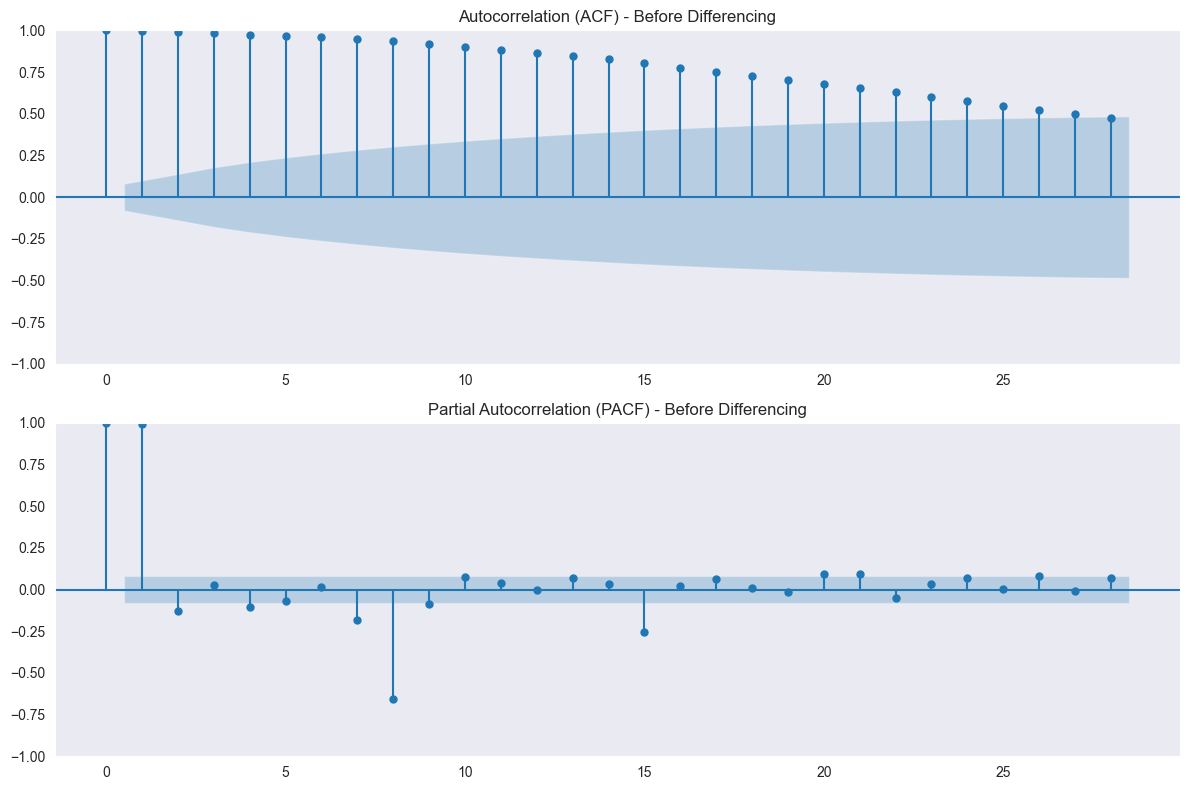

In [23]:
# Import necessary libraries
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a figure object with two subplots for autocorrelation and partial autocorrelation plots
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)  # Add subplot for autocorrelation
ax2 = fig.add_subplot(212)  # Add subplot for partial autocorrelation

# Plot autocorrelation (ACF) for the 'TT' column of the DataFrame before differencing
fig = sm.graphics.tsa.plot_acf(train_df['TT'], ax=ax1)  # Default value of lag used
ax1.set_title('Autocorrelation (ACF) - Before Differencing')

# Plot partial autocorrelation (PACF) for the 'TT' column of the DataFrame before differencing
fig = sm.graphics.tsa.plot_pacf(train_df['TT'], ax=ax2)  # Default value of lag used
ax2.set_title('Partial Autocorrelation (PACF) - Before Differencing')

# Show the plots
plt.tight_layout()
plt.show()


1. Import the necessary libraries (`statsmodels.api` for statistical modeling and `matplotlib.pyplot` for plotting).
2. Create a figure object (`fig`) with a size of 12 inches by 8 inches to hold the subplots for autocorrelation and partial autocorrelation plots.
3. Add two subplots (`ax1` and `ax2`) to the figure (`fig`) using `add_subplot`. These subplots will be used for autocorrelation and partial autocorrelation plots, respectively.
4. Plot the autocorrelation (ACF) of the 'TT' column in the DataFrame `train_df` using `sm.graphics.tsa.plot_acf` on `ax1`. The default value of lag is used to compute autocorrelation.
5. Set the title for the first subplot (`ax1`) as 'Autocorrelation (ACF) - Before Differencing'.
6. Plot the partial autocorrelation (PACF) of the 'TT' column in the DataFrame `train_df` using `sm.graphics.tsa.plot_pacf` on `ax2`. The default value of lag is used to compute partial autocorrelation.
7. Set the title for the second subplot (`ax2`) as 'Partial Autocorrelation (PACF) - Before Differencing'.
8. Use `plt.tight_layout()` to adjust the spacing between subplots for better readability.
9. Finally, display the plots using `plt.show()`.